# Math for ML: Numbers, Algebra, Functions

Before getting started on machine learning proper we need to get a few fundamental topics out of the way. To really understand machine learning, you need to know some math. Not a huge amount of math, but the basics of a few fundamental topics for sure. These include
1. **Numerical Computation:** Working with numbers on computers is a bit subtle since not all possible numbers can be represented in a computer. This means different types of numbers are represented in different ways, and knowing a little bit about that and the subtleties involved is kind of important to avoid weird numerical mistakes.
2. **Elementary Algebra:** How to read and manipulate simple equations.
3. **Elementary Functions:** What functions are and how to plot them. Both univariate and multivariate functions.
4. **Linear Algebra:** Knowing what scalars, vectors, matrices, and tensors are. Knowing how to do arithmetic with them. Knowing what a dot product and matrix multiply are.
5. **Calculus:** We don't need most of calculus. Really only the concepts of differentiation and gradients. To understand probability distributions it's also helpful to understand the most basic concept of what integration is.
6. **Optimization:** The beating heart of all machine learning. This is what it *means* to train a machine learning model. Knowing that optimization is finding the max or min of a function. Knowing how to create algorithms that find a max or min.
7. **Probability and Statistics:** Knowing what randomness is and how to deal with it, and knowing what data "is" in the form of a probability distribution. Knowing some basic ways to calculate summary information from data, like mean and standard deviation.

In the first part of this series on math for machine learning I'll focus just on topics 1 through 3, the most basic math concepts to know for machine learning. I'll also present the Greek alphabet, since it shows up a lot in machine learning equations, and it's helpful to be able to read and write many of these letters.

## Numerical Computation

Let's start by talking a bit about numbers and how they're represented on computers. This may seem too basic to mention, but it's actually very important. There's a lot of subtlety involved. Recall that in python and most other languages there are several different *types* of numbers. The most important being integers (ints) and floating point numbers (floats).

### Integers

Integers are whole numbers that can be positive, negative, or zero. Examples are 5, 100151, 0, -72, etc. 

Mathematicians like to represent the "set" of integers by the block capital-z, $\mathbb{Z}$. They like to express the phrase "x is an integer" by using the shorthand $x \in \mathbb{Z}$. The $\in$ symbol means "in" or "is an element of".

In python, ints are builtin objects of type `int` that more or less follow the rules that integers in math follow.

Integers can be
- Added: $2 + 2 = 4$.
- Subtracted: $2 - 5 = -3$.
- Multiplied: $3 * 3 = 9$.
- Exponentiated: $2^3 = 2*2*2 = 8$ (in python this is the `**` operator, e.g. `2 ** 3 = 8`)
- Remainder: the remainder of 10 when divided by 3 is 1, written $10 \text{ mod } 3 = 1$ (in python this is the `%` operator, e.g. `10 % 3 = 1`)

If any of these operations are applied to two integers, the output will itself be an integer.

In [1]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
2 + 2
2 - 5
3 * 3
10 % 3
2 ** 3

4

-3

9

1

8

What about division? You can't always divide two integers and get another integer. What you have to do instead is called integer division. Here you divide the two numbers and then round the answer down to the nearest whole number. Since $5 \div 2 = 2.5$, the nearest rounded down integer is 2. In math, 2 is sometimes called the *floor* of 2.5, represented with the funny symbol $\lfloor 2.5 \rfloor$. So we can write integer division as $\lfloor \frac{5}{2} \rfloor = 2$. In python integer division is written with the `//` operator, so `5 // 2 = 2`. I personally like this notation better than $\lfloor \frac{5}{2} \rfloor$, so I'll usually just write $5 \ // \ 2$ instead in this book.

Note that just like in math, division by zero is undefined, so `5 // 0` throws an error in python.

In [3]:
5 // 2

2

In [4]:
5 // 0

ZeroDivisionError: integer division or modulo by zero

On a computer integers like everything else are represented internally as a sequence of bits. The number of bits is sometimes called the *word size*. In python the typical word size is 64 bits. Since there are $2^{64}$ possible numbers in 64 bits, python *should* only be able to represent $2^{64}$ integers. That would mean only integers in the range $[-2^{63}+1, 2^{63}-1]$ should be valid, i.e. only the integers $-2^{63}+1, -2^{63}+2, \cdots, -1, 0, 1, \cdots, 2^{63}-2, 2^{63}-1$.

This is essentially true in older versions of pythons as well as most older programming languages like C or C++. But it turns out newer versions of python have tricks that allow you to represent essentially arbitrarily large and integers.

In [5]:
2 ** 63 - 1 # should be the max integer allowed
2 ** 100 # but this much bigger number is represented just fine!

9223372036854775807

1267650600228229401496703205376

### Floats

What if we want decimal numbers or fractions instead of whole numbers, like 1.2 or 0.99999 or 3.1415926 or 1/2? To do this we need a new system of numbers called floating point numbers, or **floats**. Floats are an attempt to represent what in math are called **real numbers**. As we'll see, floats can't represent all real numbers *exactly* because they can't express numbers with arbitrary many digits. Nevertheless, they're a reasonably good approximation to the idea of the "real line".

Mathematicians like to express the set of real numbers using the block-r $\mathbb{R}$. To write "x is a real number" they write $x \in \mathbb{R}$.

In python, floats are builtin objects of type `float`. They approximate real numbers with a given degree of precision (we'll get to this shortly).

Floats obey pretty much the same operations that integers do with some minor exceptions. They can be
- Added: $1.2 + 4.3 = 5.5$.
- Subtracted: $1.2 - 4.3 = -3.1$.
- Multiplied: $1.2 * 4.3 = 5.16$.
- Exponentiated: $4.3^2 = 18.49$.
- Remainder: $4.3 \text{ mod } 1.2 = 0.7$.
- Integer division: $4.3 \ // \ 1.2 = 3.0$.

Let's print these out in python and verify the answers are correct.

In [6]:
1.2 + 4.3
1.2 - 4.3
1.2 * 4.3
4.3 ** 2
4.3 % 1.2
4.3 // 1.2

5.5

-3.0999999999999996

5.159999999999999

18.49

0.7

3.0

Most of them look right. But what the heck is going on with `1.2 - 4.3` and `1.2 * 4.3`? We're getting these weird trailing 9s. We'll come back to this in a second.

Floats also allow for regular division, not just integer division: $4.3 \div 2 = 2.15$, or in python `4.3 / 2 = 2.15`. It turns out regular division also works fine for integers too, except that the answer will always be a float, not an integer. That means `4 / 2 = 2.0` a float, *not* `4 // 2 = 2`, an int. This is a very subtle difference that rarely is an issue, but sometimes is as we'll see later on.

In [7]:
4.3 / 2

2.15

In [8]:
4 / 2, type(4 / 2)
4 // 2, type(4 // 2)

(2.0, float)

(2, int)

Just like with ints, division by zero with floats is not allowed.

In [9]:
4.3 / 0

ZeroDivisionError: float division by zero

So what exactly "is" a float, and how are floats represented on a computer? By default, python uses what's called **double precision** for floats, which means 64 bits are used to represent a float. This is just like with ints, except there's a major difference in how the number is represented. Ints are more or less just represented by their binary sequence, e.g. the number 6 is represented with the sequence of bits `110`, which is 6 in binary.

**Aside:** We can easily get the binary representation of an integer in python using the `bin` function, which prints the binary representation of an int as a string beginning with `0b`.

In [10]:
bin(6)

'0b110'

Floats are represented very differently. Typically, 1 bit is used to represent the **sign** of the number, 11 bits to represent the **exponent** of the number (in powers of two), and the remaining 52 bits to represent the digits themselves (called the **mantissa** or **significand**). Translated into decimal terms, this means a double precision float can represent values in the range of about $[10^{-308}, 10^{308}]$, where each number can have about 15 or 16 ordinary digits of precision. This is a pretty huge range, and works fine for most applications. Any number that does not fall into this range gets truncated to the nearest float.

For example, what happens if we try to express the constant $\pi$ to its first [100 digits](https://www.wolframalpha.com/input?i=pi+to+100+digits) as a double precision float? It just gets truncated to its first 15 digits. Double precision is unable to keep track of the other 85 digits. They just get lost in the ether.

In [11]:
pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
pi

3.141592653589793

Another implication of the way floats are defined is that they are not equally spaced. That is, two nearby *small* floats are closer together than two nearby *large* floats. This seems kind of weird, but it's all due to the way the exponents are represented, which makes the smaller numbers have higher precision than larger numbers. 

One place where this non-equal spacing issue can become something to worry about is when subtracting two floats of vastly different sizes. For example, the number $10^{100}-1$, written `1e100 - 1` in python, doesn't even exist in double precision. We just get `1e100`. That is, python thinks $10^{100}-1 = 10^{100}$. However, for a much smaller number like $1000$, $1000-1=999$ works just fine.

In [12]:
1e100 - 1
1000 - 1

1e+100

999

This means you *sometimes* have to be careful about the *order* you subtract two floats when one is much larger than the other.

There is also a minimum number greater than zero. We can't just make numbers arbitrarily small anymore. For example, the very small number $10^{-323}$ is perfectly fine, but $10^{-324}=0$!

In [13]:
1e-323
1e-324

1e-323

0.0

These issues explain why we got the weird results above when subtracting `1.2 - 4.3`. The imperfect precision in the two numbers resulted in a numerical roundoff error, leading in the trailing 9s that should've rounded up to -3.1 exactly.

In [14]:
1.2 - 4.3

-3.0999999999999996

Floating point numbers also define 3 special values that aren't real numbers: positive infinity $\infty$, negative infinity $-\infty$, and "not a number" $\text{NaN}$. The infinity values are used to represent values too large to fit in memory, and NaN values show up when a number is undefined. For example, $\infty - \infty = \text{NaN}$ is undefined. 

In base python these numbers are represented as `float('inf')`, `float('-inf')`, `float('nan')`, and respectively.

These 3 special "numbers" show up all the time in machine learning, usually due to some kind of problem during training or some issue with the data, as we'll later see.

In [15]:
float('inf')
float('-inf')
float('nan')

inf

-inf

nan

In [16]:
float('inf') + float('-inf') # infinity - infinity = NaN

nan

Working with floating point numbers can sometimes be subtle. As we go, we'll see some cases where we have to treat them differently than we might treat numbers on a piece of paper. Rather than exhaustively cover all of those cases now it makes more sense in my opinion to introduce them as we need them, so I'll hold off for now.

There are also other formats for floats. Double precision is the python standard, using 64 bits to represent a float. There is also **single precision**, which uses 32 bits, as well as **half precision**, which uses 16 bits. These formats are less precise than double precision since they can't represent as many floats, but they do have their uses. Since they use fewer bits they can be used as a kind of compression if used smartly. We'll see this later on when working with deep learning models.

## Elementary Algebra

It's useful in machine learning to be able to read and manipulate basic algebraic equations, especially when reading the research literature or when trying to learn how the various algorithms work. I won't go into depth on the basics of high school algebra. Sorry but I have to assume *some* mathematical maturity of the reader, and this seems like a good place to draw the line.

You should be able to take an equation like $ax + b = c$ and solve it for $x$ in terms of coefficients $a, b, c$,
$$
\begin{align}
ax + b &= c \\
ax &= c - b \\
x &= \frac{c - b}{a}.
\end{align}
$$

You should also be able to expand simple equations like $(ax+b)^3=c$,
$$
\begin{align}
(ax + b)^2 &= c \\
(ax + b)(ax+b) &= c \\
(ax)^2 + (ax)b + b(ax) + b^2 &= c \\
a^2x^2 + abx + abx + b^2 &= c \\
a^2x^2 + 2abx + (b^2 - c) &= 0.
\end{align}
$$

That's really it. You don't even need the quadratic formula. Just simple variable manipulation like this.

## Univariate Functions

Recall that a function is a thing that maps inputs to outputs. A function $f(x)$ is a mapping that takes in a value $x$ and maps it to a unique value $y=f(x)$. These values can be either single numbers (called **scalars**), or multiple numbers (vectors or tensors). When $x$ and $y$ are scalars, $f(x)$ is called a **univariate function** or **scalar-valued function**. In this case, we can plot $x$ vs $y$ in the usual way, with $x$ on the horizontal axis and $y$ on the vertical axis.

Let's quickly cover some of the useful functions to remember that show up in machine learning. We'll see other functions later that you probably haven't seen before, but for now we'll focus on the ones covered in most math courses.

### Affine Functions

The most basic functions to be aware of are constant functions, linear functions, and affine functions. These kinds of functions show up all over the place in machine learning in either univariate or multivariate forms. Some examples of each of these are:
- Constant functions: $y=2$, $x=1$
- Linear functions: $y=-x$, $y=5x$
- Affine functions: $y=-x+1$, $y=5x-4$

All constant functions are affine functions, and all linear functions are affine functions. Note that what we call an affine function here is unfortunately called a linear function in elementary math classes, subsuming what we call a linear function as a special case with no added constant. This is unfortunate, but strictly speaking affine functions are defined as shifted linear functions (a constant is added), while linear functions *always* pass through the origin (no added constant).

Here are some plots of these functions. I'll describe how to actually set up these plots in a future lesson. Just focus on the shape of the curves, particularly how fast they grow with $x$.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

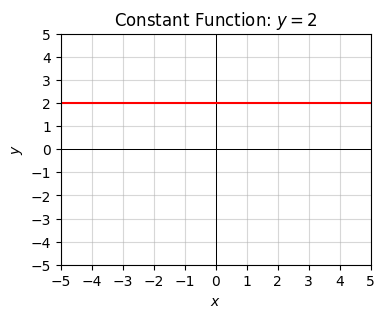

In [18]:
x = np.arange(-10, 10, 0.1)
y = 2*np.ones(len(x))
plot_function(x, y, (-5, 5), title='Constant Function: $y=2$')

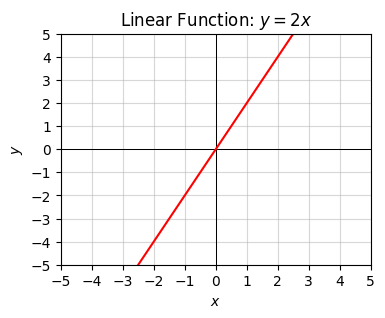

In [19]:
x = np.arange(-10, 10, 0.1)
y = 2 * x
plot_function(x, y, (-5, 5), title='Linear Function: $y=2x$')

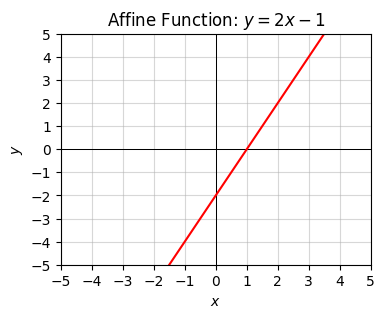

In [20]:
x = np.arange(-10, 10, 0.1)
y = 2 * x - 2
plot_function(x, y, (-5, 5), title='Affine Function: $y=2x-1$')

### Polynomial Functions

Polynomial functions are just sums of powers of $x$, e.g. something like $y=3x^2+5x+1$ or $y=x^{10}-x{3}+4$. These functions tend to look like bowls that turn up and down some number of times. 

A major example is the quadratic function $y=x^2$, which is just an upward-shaped bowl. We can get a downward-shaped bowl by flipping the sign to $y=-x^2$. Probably the most important place quadratic functions show up in machine learning is inside the power of the Gaussian function or "bell curve".

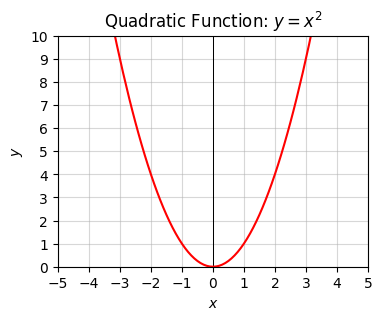

In [21]:
x = np.arange(-10, 10, 0.1)
y = x ** 2
plot_function(x, y, (-5, 5), (0, 10), title='Quadratic Function: $y=x^2$')

### Rational Functions

Rational functions are functions that are ratios of polynomial functions. Examples might be $y=\frac{1}{x}$, or $$y=\frac{x^3+x+1}{x^2-1}.$$
These functions typically look kind of like polynomial functions, but have points where the curves blow up to infinity. The points where the function blows up are called poles or asymptotes.

Here's a plot of
$$y=\frac{x^3+x+1}{x^2-1}.$$
Notice how weird it looks. There are asymptotes where the function blows up at $\pm 1$, which is where the denominator $x^2-1=0$.

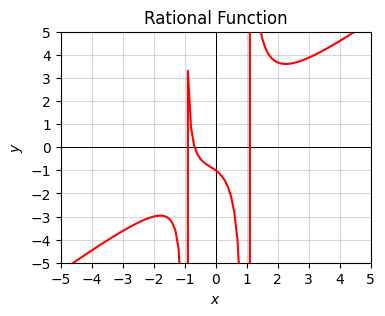

In [22]:
x = np.arange(-10, 10, 0.1)
y = (x ** 3 + x + 1) / (x ** 2 - 1)
plot_function(x, y, (-5, 5), (-5, 5), title='Rational Function')

Here's a plot of $y=\frac{1}{x}$. There's an asymptote at $x=0$. When $x > 0$ it starts at $+\infty$ and tapers down to $0$ as $x$ gets large. When $x < 0$ it does the same thing, except flipped across the origin $x=y=0$. This is an example of an odd function, a function that looks like $f(x)=-f(x)$, which is clear in this case since $1/(-x)=-1/x$.

A related function is $y=\frac{1}{|x|}$. The difference here is that $|x|$ can never be negative. This means $f(x)=f(-x)$. This is called an even function. Functions like this are symmetric across the y-axis.

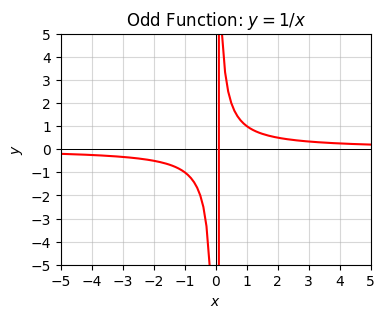

In [23]:
x = np.arange(-10, 10, 0.1)
y = 1 / x
plot_function(x, y, (-5, 5), (-5, 5), title='Odd Function: $y=1/x$')

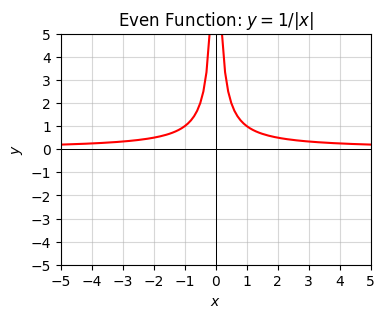

In [24]:
x = np.arange(-10, 10, 0.1)
y = 1 / np.abs(x)
plot_function(x, y, (-5, 5), (-5, 5), title='Even Function: $y=1/|x|$')

### Power Law Functions

Functions that look like $y=\frac{1}{x^n}$ for some $n$ have a special form. These are sometimes called inverse, hyperbolic, or power law functions. These can be represented more easily by using a negative power like $y=x^{-n}$, which means the exact same thing as $y=\frac{1}{x^n}$.

We can extend $n$ to deal with things like square roots or cube roots or any kind of root as well by allowing $n$ to be non-integer. For example, we can represent the square root function $y=\sqrt{x}$ as $y=x^{1/2}$, and the cube root $y=\sqrt[3]{x}$ as $y=x^{1/3}$.

Here's a plot of what the square root function looks like. Here $y$ grows slower than a linear function, but still grows arbitrarily large with $x$.

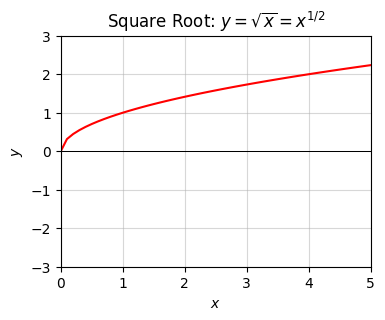

In [25]:
x = np.arange(0, 10, 0.1)
y = np.sqrt(x)
plot_function(x, y, (0, 5), (-3, 3), title='Square Root: $y=\sqrt{x}=x^{1/2}$')

### Exponentials and Logarithms

Two very important functions are the exponential function $y=e^x$ and the logarithm function $y=\log(x)$. The value $e \approx 2.71828$ is called Euler's number, an irrational number (i.e. you can't represent it exactly as a fraction of two integers).

The exponential function is a function that blows up very, very quickly. The logarithm function grows very, very slowly (much more slowly than the square root does).

Here are some plots of what the exponential and logarithm functions look like. Note that the logarithm function is only defined for positive-valued numbers $x \geq 0$, with $\log(0)=-\infty$. This is the dual of the exponential function only taking on $y \geq 0$.

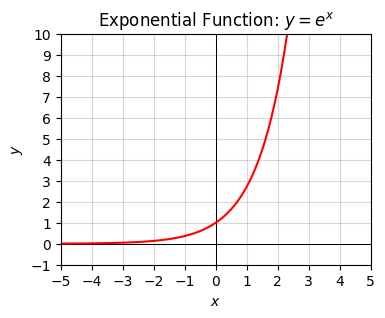

In [26]:
x = np.arange(-5, 5, 0.1)
y = np.exp(x)
plot_function(x, y, (-5, 5), (-1, 10), title='Exponential Function: $y=e^x$')

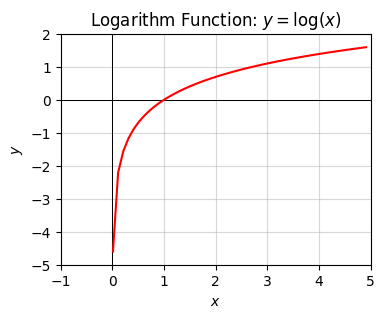

In [27]:
x = np.arange(0.01, 5, 0.1)
y = np.log(x)
plot_function(x, y, (-1, 5), (-5, 2), title='Logarithm Function: $y=\log(x)$')

The logarithm is the inverse of the exponential function (i.e. it "undoes" the exponential operation). Similarly the exponential function is the inverse of the logarithm function. In each case, applying one after the other just gives you the same thing back that we had before:
$$ \log(e^x) = e^{\log(x)} = x.$$

Note that the logarithm has different bases. Most commonly we care about the "natural" base defined above, sometimes written $\ln(x)$ instead. There are also other bases that sometimes show up as well, like the base-2 logarithm $\log_{2}(x)$, which is the inverse of $2^x$, and the base-10 logarithm $\log_{10}(x)$, which is the inverse of $10^x$.

Exponentials obey the following laws:
$$e^0 = 1,$$
$$e^{a+b} = e^a e^b,$$
$$e^{a-b} = \frac{e^a}{e^b},$$
$$e^{ab} = (e^a)^b,$$
$$a^b = e^{b \log(a)}.$$

While logarithms obey their own similar laws:
$$\log(1) = 0,$$
$$\log(e) = 1,$$
$$\log(ab) = \log(a) + \log(b),$$
$$\log\big(\frac{a}{b}\big) = \log(a) - \log(b),$$
$$\log(a^b) = b\log(a),$$
$$\log_a(x) = \frac{\log(x)}{\log(a)}.$$

### Trigonometric Functions

The last two textbook functions I'll remind you of are the two trig functions sine $\sin(x)$ and cosine $\cos(x)$. These won't come up very much in ML though so you don't need to know that much other than what their plots look like, which are just waves. Note that the cosine is just a sine function that's shifted right by $\frac{\pi}{2} \approx 1.57$.

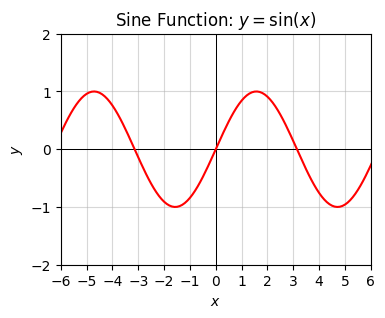

In [28]:
x = np.arange(-10, 10, 0.1)
y = np.sin(x)
plot_function(x, y, (-6, 6), (-2, 2),  title='Sine Function: $y=\sin(x)$')

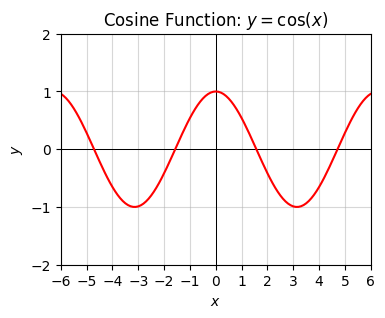

In [29]:
x = np.arange(-10, 10, 0.1)
y = np.cos(x)
plot_function(x, y, (-6, 6), (-2, 2), title='Cosine Function: $y=\cos(x)$')

### Compositional Functions

We can also of course have any arbitrary hybrid of the above functions. We can apply exponentials to affine functions, logs to sine functions, sines to exponential functions. In essence, this kind of layered composition of functions is what a neural network is as we'll see later on.

A mathematician might write an abstract compositional function as a function applied to another function, like $y=f(g(x))$ or $y=(f \circ g)(x)$. These can be chained arbitrarily many times, not just two.

Consider, for example, the function composition done by applying the following functions in sequence:
- an affine function $y=wx+b$
- followed by a linear function $y=-x$
- followed by an exponential function $y=e^x$
- followed by a rational function $y=\frac{1}{x}$

to get the full function
$$y = \frac{1}{1 + e^{-(wx+b)}}.$$

Here's a plot of what this function looks like for the "standard" sigmoid where $w=1, b=0$. Notice that $0 \leq y \leq 1$. The values of $x$ get "squashed" to values between 0 and 1 after a sigmoid is applied.

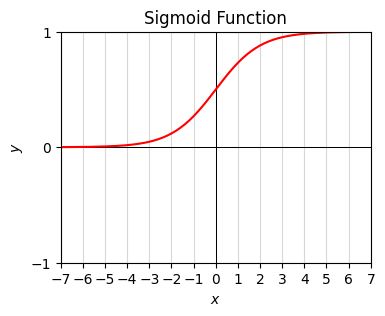

In [30]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))
plot_function(x, y, (-7, 7), (-1, 1), title='Sigmoid Function')

This function is called the **sigmoid** function, and is very important in machine learning since it in essence creates probabilities. We'll see it a lot more. The standard form is usually written $\sigma(x)$, i.e. $$\sigma(x) = \frac{1}{1 + e^{-x}}.$$
Arbitrary affine transformations of the standard form would then be written as $\sigma(wx+b)$.

Another similar looking function shows up sometimes in machine learning. It's called the **hyperbolic tangent** or **tanh** function, (when $w=1,b=0$) has the form
$$y = \frac{e^x - e^{-x}}{e^x + e^{-x}}.$$

The tanh function, called that because it's usually written as $\tanh(x)$, looks pretty much the same as the sigmoid, except it's scaled vertically so that $-1 \leq y \leq 1$.

Here's a plot of the tanh function. Notice how similar it looks to the sigmoid with the exception of the scale of the y-axis.

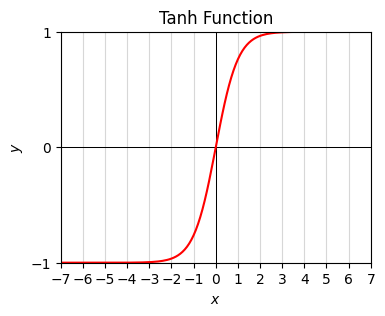

In [31]:
x = np.arange(-10, 10, 0.1)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plot_function(x, y, (-7, 7), (-1, 1), title='Tanh Function')

## Multivariate Functions

What we've covered thus far only deals with univariate functions, functions where $y=f(x)$, but $x$ and $y$ are just single numbers, i.e. scalars. In machine learning we're almost always dealing with multivariate functions with *lots* of variables, sometimes billions of them. It turns out that most of what I've covered so far extends straight forwardly to multivariate functions with some small caveats, which I'll cover below.

Simply put, a multivariate function is a function of multiple variables. Instead of a single $x$, we might have a bunch of variables, like $x, y, z, a, b, c$ or whatever:
$$f(x, y, z, a, b, c).$$
If you think of a multivariate function like a python function this shouldn't be surprising. Functions can and do usually take multiple arguments. 

Here's an example of a function that takes two arguments $x$ and $y$ and produces a single output $z$, more often written as $z=f(x,y)$. The function we'll look at is $z = x^2 + y^2$. I'll evaluate the function at three points:
- $x=0$, $y=0$,
- $x=1$, $y=-1$,
- $x=0$, $y=1$.

The main thing to notice is the function does exactly what you think it does. You plug in 2 values, and you get out 1 value that's just the sum of squares of those two. Not rocket science.

In [32]:
f = lambda x, y: x ** 2 + y ** 2
f(0, 0), f(1, -1), f(0, 1)

(0, 2, 1)

We can also have functions that map multiple inputs to multiple outputs. Suppose we have a function that takes in 2 values $x, y$ and outputs 2 values $a, b$. We'd write this as $(a,b) = f(x,y)$. Let's try the example of
$$(a, b) = f(x,y) = (x+y, x-y).$$
This is really just two functions, both functions of $x$ and $y$. That is, we can completely equivalently write this function as
$$a = f_1(x, y) = x + y,$$
$$b = f_2(x, y) = x - y.$$
Let's evaluate it at the point $x=1$, $y=1$. Again, looks pretty intuitive.

In [33]:
f = lambda x, y: (x + y, x - y)
f(1, 1)

(2, 0)

For now I'll just focus on the case of multiple inputs, single output like the first example. These are usually called **scalar-valued functions**. The case of multiple outputs is usually called **vector-valued functions**. Using multiple outputs starts to get into the realm of linear algebra, which I'll touch on in a future lesson.

A scalar-valued function of $n$ variables $x_1, x_2, \cdots, x_n$ has the form
$$y = f(x_1, x_2, \cdots, x_n).$$
Note $n$ can be as large as we want it to be. When working with deep neural networks (which are just multivariate functions of a certain form) $n$ can be huge. For example, if the input is a $256 \times 256$ image, the input might be $256^2=65536$ pixels. For a 10 second audio clip that's sampled at 44 kHz, the input might be $10*44k=440k$ amplitudes. Large numbers indeed.

Calculating the output of multivariate functions is just as straight-forward as for univariate functions pretty much. Unfortunately, visualizing them is much harder. The human eye can't see 65536 dimensions, only 3 dimensions. This in some sense means we need to give up on the ability to "graph" a function and instead find other ways to visualize it.

One simple thing that can be done is plotting slices of the function. Suppose for example we have a function $y=f(x_1,x_2,x_3)$. We'd like to understand how $y$ depends on the variable $x_1$. What we could do is *fix* $x_2$ and $x_3$ to be some values, and pretend that $y$ is a function of $x_1$ alone, then plot $x_1$ vs $y$.

As an example, consider the function $y=x_1^2 + x_2^2 + x_3^2$. Let's set $x_2$ and $x_3$ to be some constant values, say $x_2=1$, $x_3=1$. Then we get a slice $y=x_1^2+1^2+1^2=x_1^2+2$, which we can easily plot. Looks like we've got a parabola again, but shifted up by 2 units. Note these slices will *always* look like this since since it's always going to be of the form $y=x_1^2 + \text{constant}$. We just get a family of shifted parabolas.

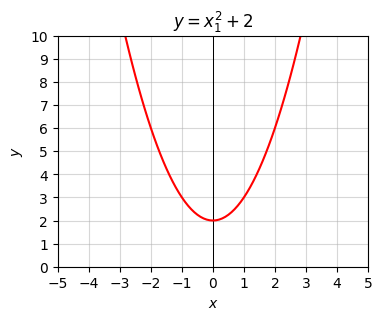

In [34]:
x1 = np.arange(-5, 5, 0.1)
x2 = x3 = 1
y = x1 ** 2 + x2 ** 2 + x3 ** 2
plot_function(x1, y, (-5, 5), (0, 10), title='$y=x_1^2+2$')

We'll see more examples of multivariate functions in the coming lessons, as they're used to mathematically define the form of many machine learning algorithms.

## Appendix: Greek Alphabet

Like many other technical fields, machine learning makes heavy use of the Greek alphabet to represent variable names in mathematical equations. While not all Greek characters are used, certain ones are worth being aware of. Below is a [table](https://howtosaymathematics.files.wordpress.com/2011/08/greek-alphabet2.pdf) of the Greek letters upper and lower case, as well as a guide on how to pronounce and write them.

You don't need to memorize all of these letters, but any time you see one in a future lesson you should come back to the table below and try to memorize the name of the letter and how it's pronounced. It's also worth taking some time to learn how to write the letters you see come up so you can write the equations down yourself and manipulate them.

<img src="../resources/greek.png" width=550>

Typically in machine learning many of these letters represent a specific thing that will always more or less mean the same thing. For example, the lower case mu, $\mu$, often represents the mean of a distribution of numbers. The lower case sigma, $\sigma$, often represents the standard deviation of a distribution. These two both represent the parameters of some kind of distribution, in this case the Gaussian or Normal distribution. There are other distributions as well that have other parameters.

Greek letters are also often used to represent training hyperparameters. The lower case lambda, $\lambda$, usually represents the regularization or weight decay hyperparameter. The lower case alpha, $\alpha$ often represents the learning rate hyperparameter. Other optimizers we'll see will use still other letters.